### Student Information
Name:陳俊廷

Student ID:107065502

GitHub ID:29743586

---

### Instructions

- First, you should attempt the **take home** exercises provided in the [notebook](https://github.com/omarsar/data_mining_lab/blob/master/news_data_mining.ipynb) we used for the first lab session. Attempt all the exercises, as it is counts towards the final grade of your first assignment (20%). 

- Then, download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read the specificiations of the dataset before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation steps learned in the [first lab session](https://github.com/omarsar/data_mining_lab) on **the new dataset**. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 30% of your grade!

- In addition to applying the same operations from the first lab, we are asking that you attempt the following tasks on the new sentiment dataset as well (40%):
    - Use your creativity and imagination to generate **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) on how you may go about doing this. Keep in mind that you are generating a matrix similar to the term-document matrix we implemented in our first lab session. However, the weights will be computed differently and should represent the TF-IDF value of each word per document as opposed to the word frequency.
    - Using both the TF-IDF and word frequency features, try to compute the **similarity** between random sentences and report results. Read the "distance simiilarity" section of the Data Mining textbook on what measures you can use here. [Cosine similarity](https://jamesmccaffrey.wordpress.com/2017/03/29/the-cosine-similarity-of-two-sentences/) is one of these methods but there are others. Try to explore a few of them in this exercise and report the differences in result. 
    - Lastly, implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Refer to this [nice article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/) on how to build this type of classifier using scikit-learn. Report the classification accuracy of both your models. If you are struggling with this step please reach us on Slack as soon as possible.   


- Presentation matters! You are also expected to **tidy up your notebook** and attempt new data operations and techniques that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade. The idea of this exercise is to begin thinking of how you will program the concepts you have learned and the process that is involved. 


- After completing all the above tasks, you are free to remove this header block and **submit** your assignment following the guide provided in the [README.md](https://github.com/omarsar/dm_2018_hw_1/blob/master/README.md) file of the assignment's repository. 

In [9]:
### Begin Assignment Here!
import csv
import pandas as pd
import helpers.data_mining_helpers as dmh
text=[]
rank=[]
def build_frame(file_name):
    # 開啟 txt 檔案
    f = open(file_name,encoding = 'utf-8-sig')
    lines=f.readlines()

    #get text and rank
    for row in lines:
        row0=row.strip("\n").split("\t")[0]
        row1=row.strip("\n").split("\t")[1]
        text.append([row0])
        rank.append(int(row1))
    
build_frame('yelp_labelled.txt')
build_frame('amazon_cells_labelled.txt')
build_frame('imdb_labelled.txt')

Frame=pd.DataFrame.from_records(text,columns=['text'])
Frame['score']=rank
    
Frame[-10:]

,text,score
2990,"The opening sequence of this gem is a classic,...",1
2991,Fans of the genre will be in heaven.,1
2992,Lange had become a great actress.,1
2993,It looked like a wonderful story.,1
2994,I never walked out of a movie faster.,0
2995,I just got bored watching Jessice Lange take h...,0
2996,"Unfortunately, any virtue in this film's produ...",0
2997,"In a word, it is embarrassing.",0
2998,Exceptionally bad!,0
2999,All in all its an insult to one's intelligence...,0


In [10]:
# using iloc (by position)
Frame.iloc[::10, :][0:10]

,text,score
0,Wow... Loved this place.,1
10,Service was very prompt.,1
20,The Burrittos Blah!,0
30,"Also there are combos like a burger, fries, an...",1
40,The shrimp tender and moist.,1
50,We ordered the duck rare and it was pink and t...,1
60,At least think to refill my water before I str...,0
70,"The deal included 5 tastings and 2 drinks, and...",1
80,Coming here is like experiencing an underwhelm...,0
90,"In summary, this was a largely disappointing d...",0


In [11]:
# using loc (by label)
Frame.loc[::10, 'text'][0:10]

0                              Wow... Loved this place.
10                             Service was very prompt.
20                                  The Burrittos Blah!
30    Also there are combos like a burger, fries, an...
40                         The shrimp tender and moist.
50    We ordered the duck rare and it was pink and t...
60    At least think to refill my water before I str...
70    The deal included 5 tastings and 2 drinks, and...
80    Coming here is like experiencing an underwhelm...
90    In summary, this was a largely disappointing d...
Name: text, dtype: object

In [12]:
# standard query (Cannot simultaneously select rows and columns)
Frame[::10][0:10]

,text,score
0,Wow... Loved this place.,1
10,Service was very prompt.,1
20,The Burrittos Blah!,0
30,"Also there are combos like a burger, fries, an...",1
40,The shrimp tender and moist.,1
50,We ordered the duck rare and it was pink and t...,1
60,At least think to refill my water before I str...,0
70,"The deal included 5 tastings and 2 drinks, and...",1
80,Coming here is like experiencing an underwhelm...,0
90,"In summary, this was a largely disappointing d...",0


In [13]:
Frame[Frame['score']==0][::10][:5]

,text,score
1,Crust is not good.,0
18,"This place is not worth your time, let alone V...",0
41,There is not a deal good enough that would dra...,0
72,The service was meh.,0
86,The poor batter to meat ratio made the chicken...,0


In [14]:
Frame.isnull().apply(lambda x: dmh.check_missing_values(x))   #check null

text     (The amoung of missing records is: , 0)
score    (The amoung of missing records is: , 0)
dtype: object

In [15]:
#to see if there's any identicle record or text 
print("duplicated text number: ",sum(Frame.duplicated('text')))
print(Frame[Frame.duplicated('text')==True].text)
if Frame.iloc[814].text==Frame.iloc[816].text:
    print("!")
Frame.iloc[816].text


duplicated text number:  17
814                                    I love this place.
816                                The food was terrible.
843                                      I won't be back.
846                     I would not recommend this place.
1285                                        Great phone!.
1407                                         Works great.
1524                                        Works great!.
1543                              Don't buy this product.
1744    If you like a loud buzzing to override all you...
1748                                        Does not fit.
1778                                This is a great deal.
1792                                         Great Phone.
1892                     Excellent product for the price.
1896                                         Great phone.
2363                     Definitely worth checking out.  
2585                                   Not recommended.  
2788                                        

'The food was terrible.'

In [16]:
print(sum(Frame.duplicated()))
print(sum(Frame.duplicated('text')))
#Frame.drop_duplicates(keep="first", inplace=True) # inplace applies changes directly on our dataframe    # keep="first"會保留一筆

17
17


In [17]:
print(sum(Frame.duplicated()))

17


In [18]:
sample = Frame.sample(n=500) #random state
sample[:10]

,text,score
488,"It was attached to a gas station, and that is ...",0
2183,Maybe there would be a reasonable explanation ...,0
503,The ambiance was incredible.,1
2722,"It isn't even an achievement as a ""so-bad-it's...",0
2211,"He owns the film, just as Spacek owned ""Coal M...",1
2020,I can think of no other film where something v...,1
2808,When a song could explain the emotions of the ...,1
1117,It is very comfortable on the ear.,1
1192,Lately they have been extremely nice and helpf...,1
2679,The aerial scenes were well-done.,1


In [19]:
print(Frame.score.value_counts())

# plot barchart for X
Frame.score.value_counts().plot(kind = 'bar',                            # kind: 哪種圖
                                    title = 'Score Category distribution',         # rot: rotation 往逆時針轉幾度, 0度是平的
                                    ylim = [0, 650],                         # figsize: 前面8是寬度，後面是高度
                                    rot = 0, fontsize = 12, figsize = (8,3))

1    1500
0    1500
Name: score, dtype: int64


In [20]:
#form the term frequency matrix
from sklearn.feature_extraction.text import CountVectorizer
countvec=CountVectorizer()
doc_term=countvec.fit_transform(Frame.text)

In [21]:
doc_term

<3000x5155 sparse matrix of type '<class 'numpy.int64'>'
	with 31578 stored elements in Compressed Sparse Row format>

In [22]:
analyze = countvec.build_analyzer()


In [23]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(doc_term.toarray())  #轉成一個numpy.ndarray 型態的陣列

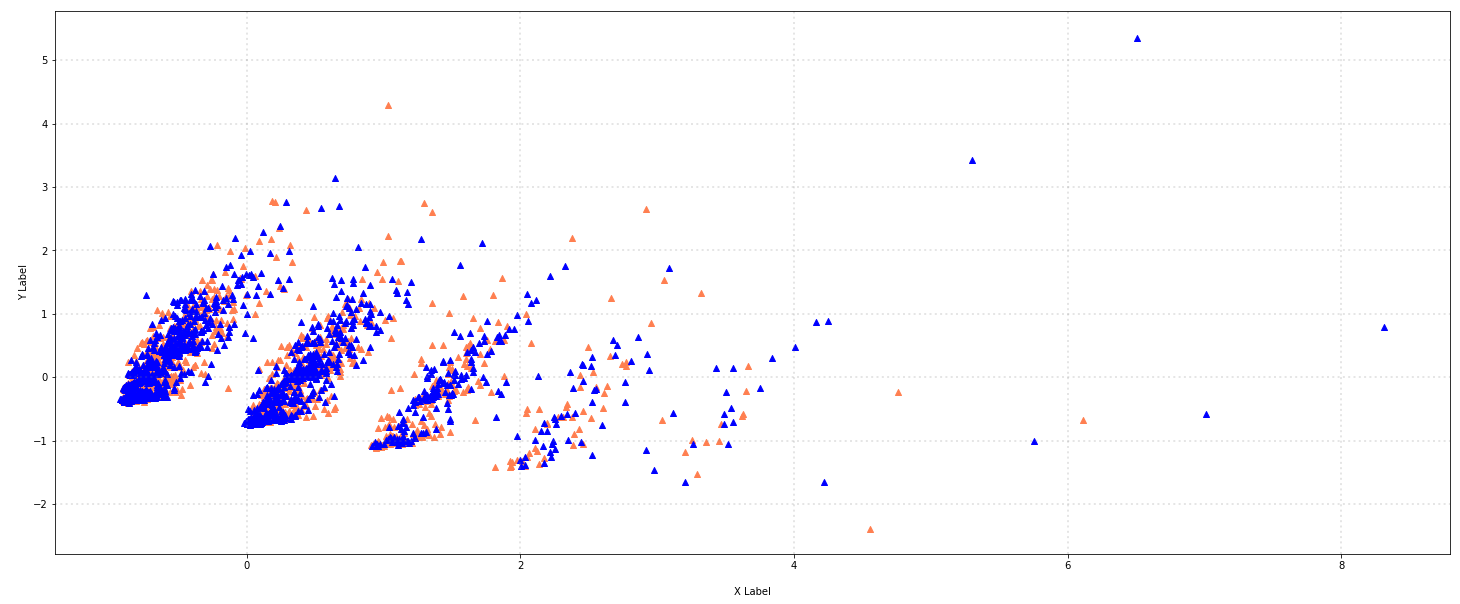

In [24]:
import matplotlib.pyplot as plt
color = ['coral', 'blue']
categories=[0,1]
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, score in zip(color, categories):                #zipped = zip(a,b) --->打包为元组的列表 [(1, 4), (2, 5), (3, 6)]
    xs = X_reduced[Frame['score'] == score].T[0]   #找到category_name=某個category的資料  回傳index 
    ys = X_reduced[Frame['score'] == score].T[1]   # numpy.ndarray.T: 行列交換, 行變列 列變行 //transpose()轉置矩陣
   
    ax.scatter(xs, ys, c = c, marker='^')   #marker:點的樣子 是甚麼形狀
    
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

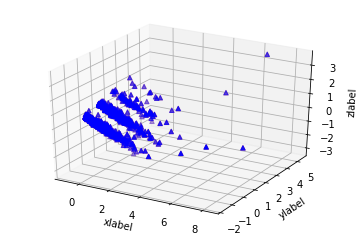

matplotlib.axes._subplots.Axes3DSubplot

In [31]:
from mpl_toolkits.mplot3d import Axes3D
x_reduce3=PCA(n_components = 3).fit_transform(doc_term.toarray())
color = ['coral', 'blue']
fig=plt.figure() #figsize=(25,10)
ax=fig.add_subplot(111, projection='3d')
for c, category in zip(color,categories):
    xs=x_reduce3[Frame['score'] == score].T[0]
    ys=x_reduce3[Frame['score'] == score].T[1]
    zs=x_reduce3[Frame['score'] == score].T[2]
    ax.scatter(xs,ys,zs,c=c,marker="^",zdir='z')
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel("xlabel")
ax.set_ylabel("ylabel")
ax.set_zlabel("zlabel")
plt.show()
type(ax)


In [26]:
Frame.score.value_counts()

1    1500
0    1500
Name: score, dtype: int64

In [33]:
# plot the terms that have the frequecy larger than 7, the order from the highest to lowest frequecy
import numpy as np
import plotly.plotly as py
import helpers.text_analysis as ta
import math
#term_frequencies = [math.log(i)for i in np.asarray(doc_term.sum(axis=0))[0]]
term_frequencies = np.asarray(doc_term.sum(axis=0))[0]
freq_=pd.DataFrame(term_frequencies,columns=['frequency'])
freq_=freq_.sort_values('frequency',ascending=False)
freq=freq_[freq_.frequency.values>7]
term_frequencies_sort=[countvec.get_feature_names()[index] for index in freq.index]  # if 列出前50個最常出現的term: 改成 freq[:50].index 
py.iplot(ta.plot_word_frequency([term_frequencies_sort[:], freq.frequency.tolist()[:]], "Term Frequency \'Higher than 7\' Distribution"))


C:\Users\jeffery\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




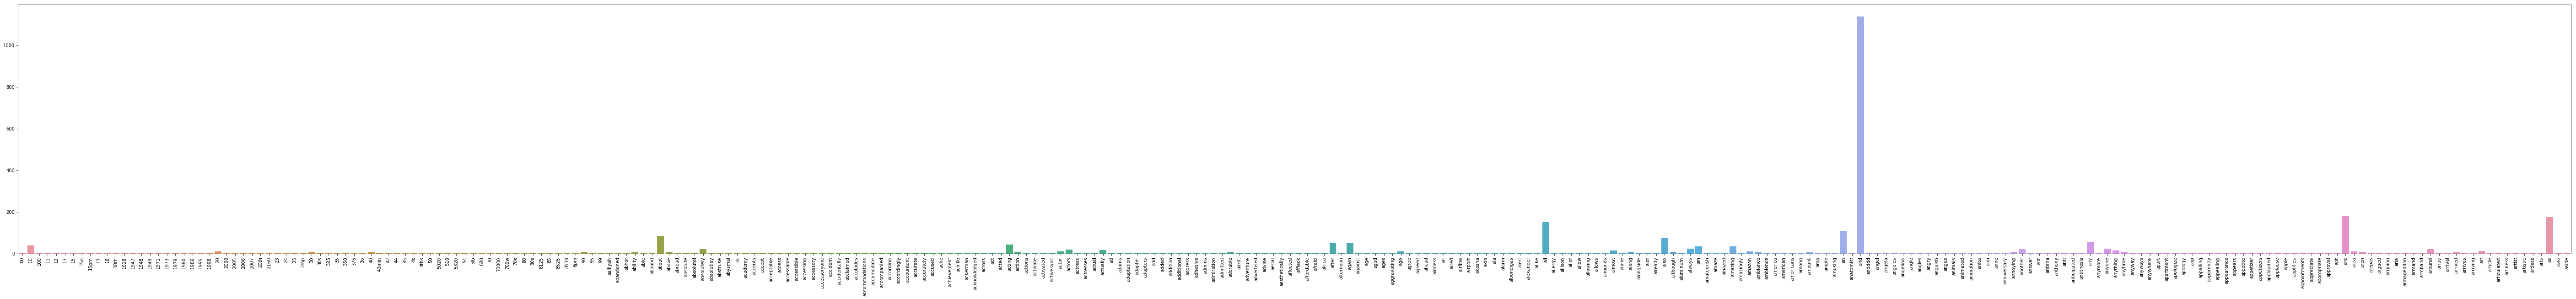

In [34]:
import seaborn as sns
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=countvec.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(countvec.get_feature_names()[:300], rotation = 90);

In [35]:
# form a TF-IDF matrix
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(Frame.text)

In [36]:
tf_idf[:100,:100].toarray()
vectorizer.get_feature_names()[:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

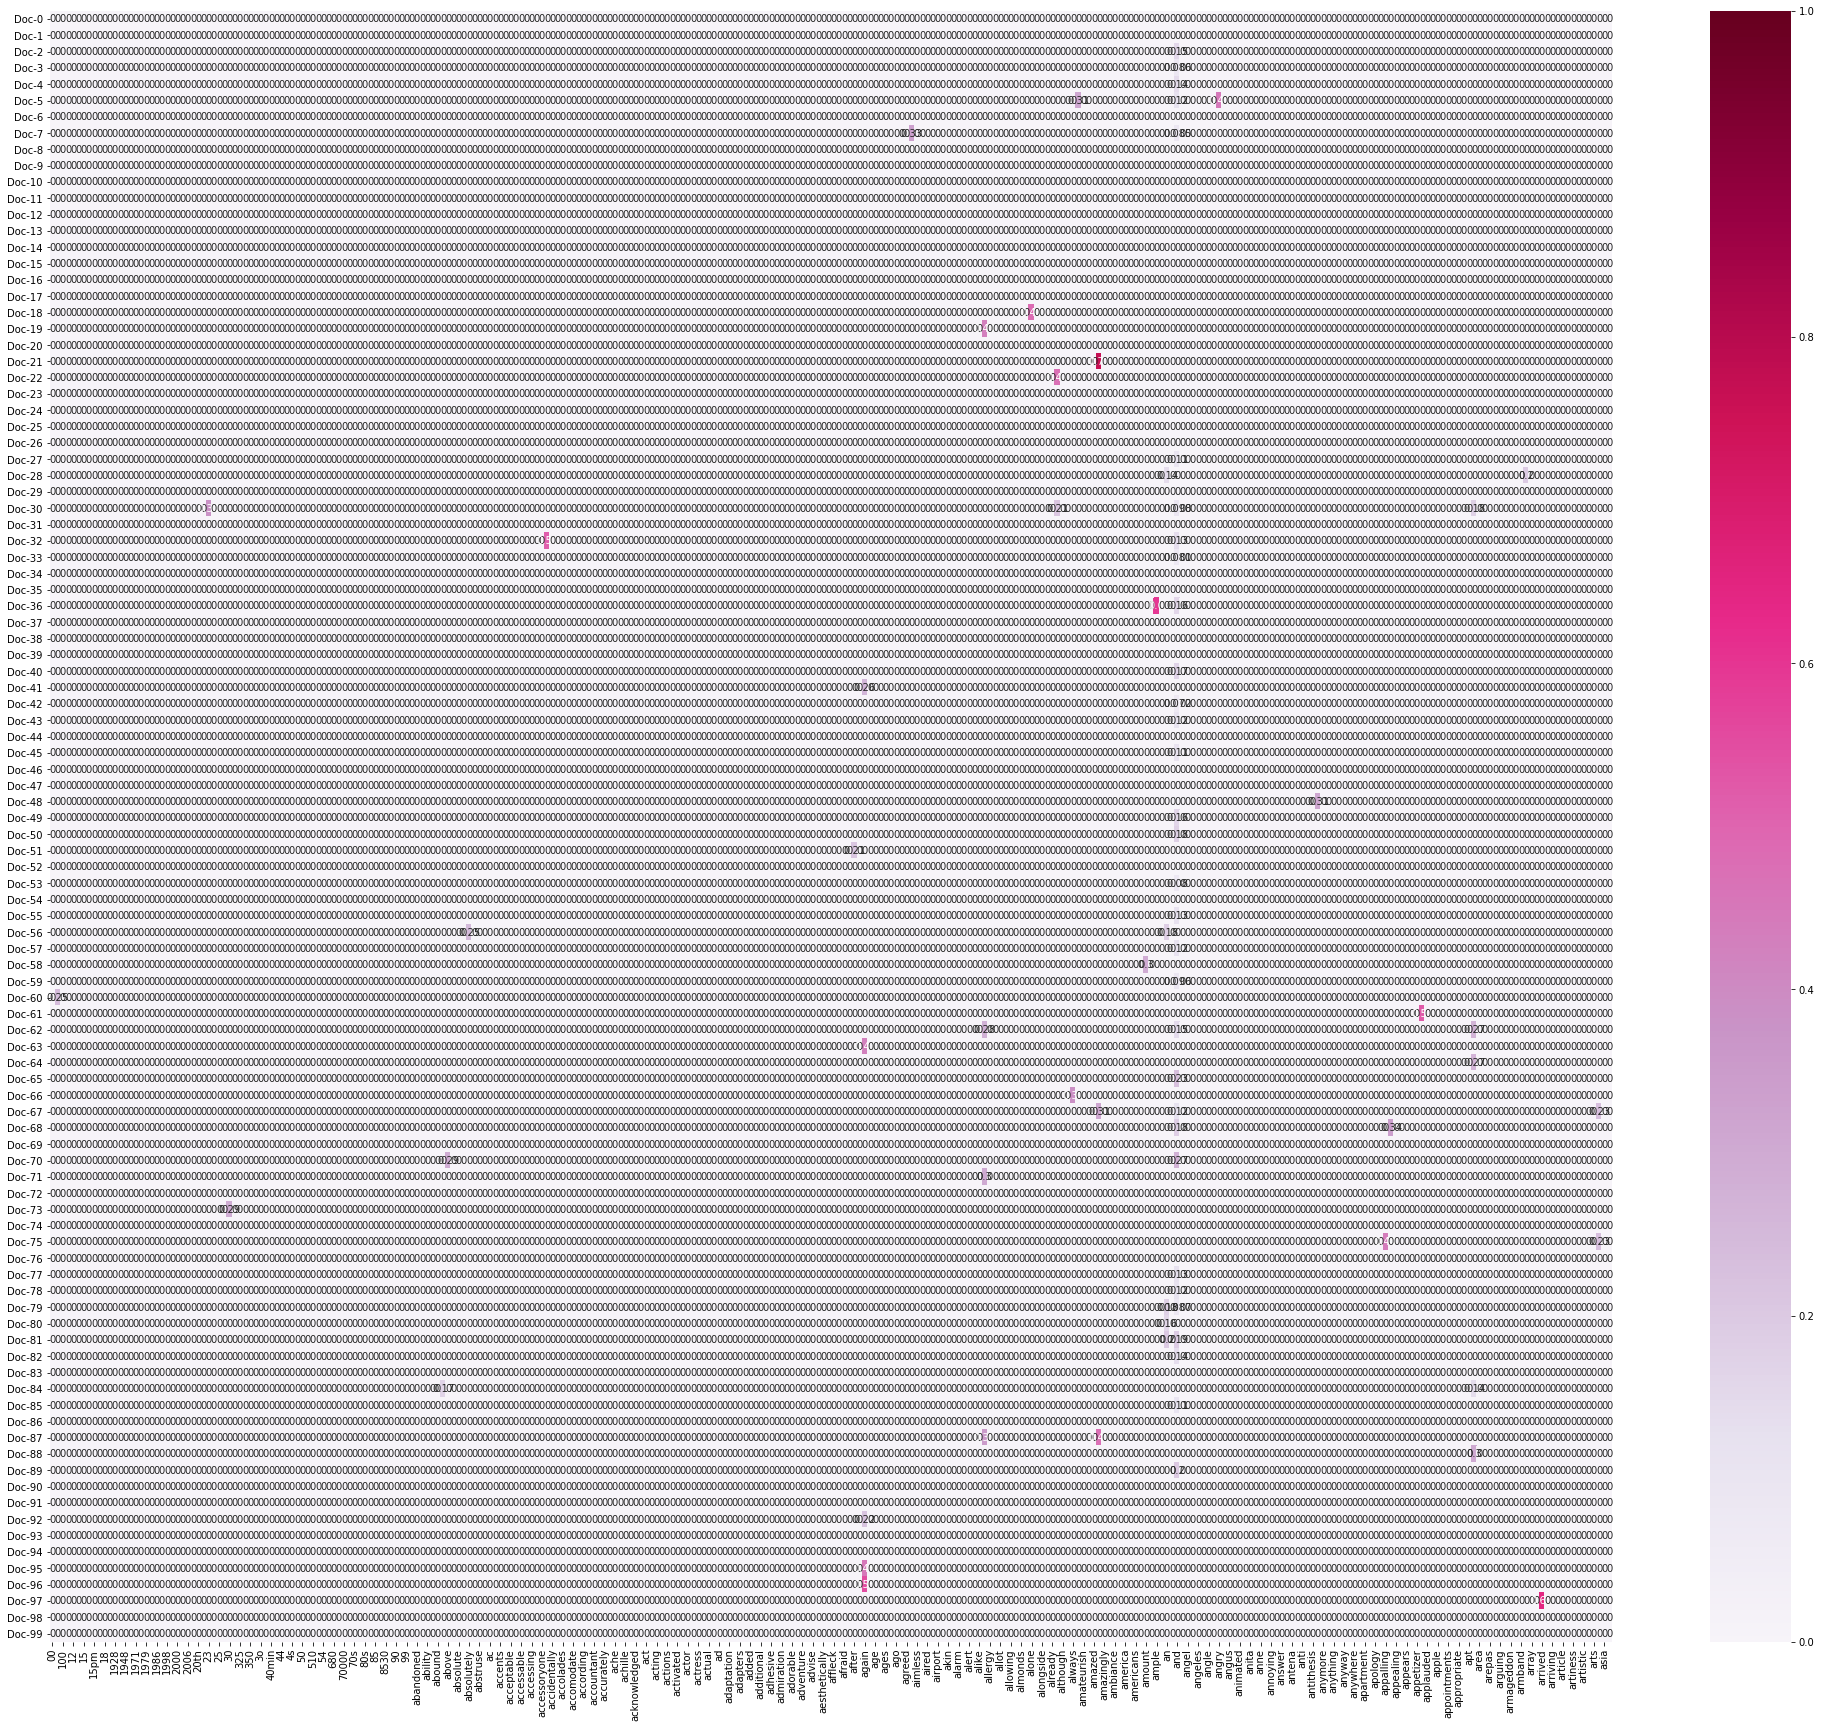

In [37]:
#tf-idf matrix
import seaborn as sns
import matplotlib.pyplot as plt
x=vectorizer.get_feature_names()[:300]
y=["Doc-"+ str(i) for i in list(Frame.index)[0:100]]
z=tf_idf[:100,:300].toarray()
df_todraw = pd.DataFrame(z, columns = x, index = y)
plt.subplots(figsize=(35, 30))  #寬，高
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)   #annot: annotate the value if true-->填值  cmap: colormap 的顏色   

In [38]:
#form the doc_to_doc cosine similarity matrix
from sklearn.metrics.pairwise import cosine_similarity

#Cosine Similarity of word frequency
cosine_similar_fre=cosine_similarity(doc_term.toarray(),doc_term.toarray())  # or can just write cosine_similarity( tf_idf.toarray() )
# Cosine Similarity of tf_idf
cosine_similar_tfidf=cosine_similarity(tf_idf.toarray(),tf_idf.toarray())  # or can just write cosine_similarity( tf_idf.toarray() )

#Euclidean Distance matrix of tf_idf
from scipy.spatial import distance
whole_matrix=[]
for doc_row in tf_idf.toarray():
    each_row=[]
    for doc_r in tf_idf.toarray():
        dst = distance.euclidean(doc_row,doc_r)
        each_row.append(dst)
    whole_matrix.append(each_row)
    
#Euclidean Distance matrix of word frequency
whole_matrix_freq=[]
for doc_row in doc_term.toarray():
    each_row=[]
    for doc_r in doc_term.toarray():
        dst = distance.euclidean(doc_row,doc_r)
        each_row.append(dst)
    whole_matrix_freq.append(each_row)

In [39]:
print("cosine_similar_frequency: \n",cosine_similar_fre[:10,:10],"\n")
print("cosine_similar_tf_idf: \n",cosine_similar_tfidf[:10,:10],"\n\n")
euclidean_freq=np.asarray(whole_matrix_freq[:10])
euclidean_tf=np.asarray(whole_matrix[:10])
print("Euclidean_distance_frequency: \n",euclidean_freq[:,:10],"\n")
print("Euclidean_distance_tf_idf: \n",euclidean_tf[:,:10])

cosine_similar_frequency: 
 [[1.         0.         0.         0.12909944 0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.1767767  0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.1767767  1.         0.18257419 0.41666667 0.11785113
  0.         0.15430335 0.15811388 0.        ]
 [0.12909944 0.         0.18257419 1.         0.24343225 0.0860663
  0.10540926 0.11268723 0.11547005 0.        ]
 [0.         0.         0.41666667 0.24343225 1.         0.07856742
  0.         0.25717225 0.52704628 0.16666667]
 [0.         0.         0.11785113 0.0860663  0.07856742 1.
  0.         0.0727393  0.         0.        ]
 [0.         0.         0.         0.10540926 0.         0.
  1.         0.         0.         0.        ]
 [0.         0.         0.15430335 0.11268723 0.25717225 0.0727393
  0.         1.         0.19518001 0.        ]
 [0.         0.         0.15811388 0.11547005 0.52704628 0.
  0.         0.19518001 1.

In [40]:
#任選一人為男或女的機率，由過去的經驗，可設為1/2，此即所謂事前機率(prior probability)。
#但若給了一些條件，則在這些條件下，其機率是有可能改變的。
#此時之機率，便稱為條件機率，是一種事後機率(posterior probability)。

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

#Tf-Idf classifier
'''
X=tf_idf.toarray()
Y=Frame.score.values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25) #    # of train:750 ,  # of test:250
'''
X_train=tf_idf.toarray()[-750:]
Y_train=Frame.score.values[-750:]
X_test=tf_idf.toarray()[:250]
Y_test=Frame.score.values[:250]
clf = MultinomialNB()  #clf:classifier
clf.fit(X_train, Y_train)
print("accuracy: ",clf.score(X_test, Y_test))     #  Returns the mean accuracy
print(clf.predict(X_test))






accuracy:  0.716
[1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1
 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1
 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1
 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0]


In [42]:
#Frequency classifier


X_train=doc_term.toarray()[-750:]
Y_train=Frame.score.values[-750:]
X_test=doc_term.toarray()[:250]
Y_test=Frame.score.values[:250]
clf = MultinomialNB()  #clf:classifier
clf.fit(X_train, Y_train)
print("accuracy: ",clf.score(X_test, Y_test))     #  Returns the mean accuracy
print(clf.predict(X_test))


accuracy:  0.684
[0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1
 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1
 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0]
